# Problem 1 

Many comets travel in highly elongated orbits around the Sun. For much of their lives, they are far from the solar system, moving slowly. However, on rare occasions, their orbits bring them close to the Sun for a brief encounter, during which they move very rapidly for a short period of time.

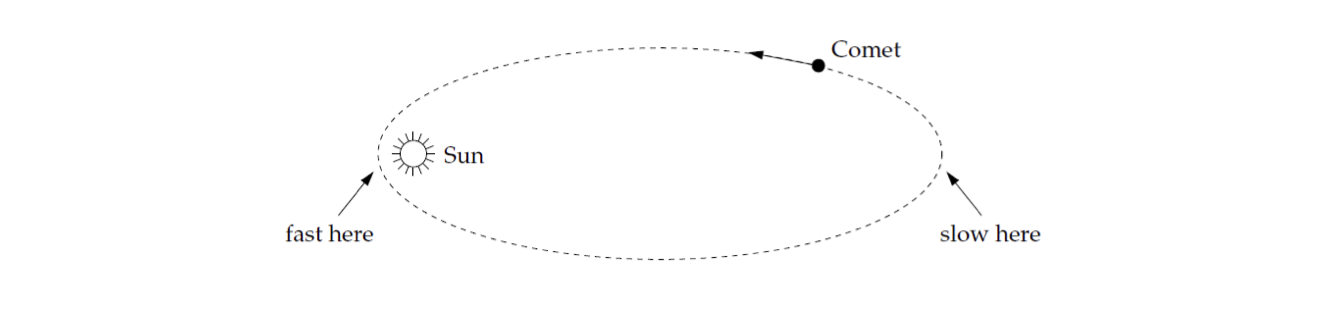

The differential equation obeyed by a comet is easy to derive. The force between the Sun, with mass M at the origin, and a comet of mass m with position vector $\vec{r}$ is GMm/r^2 in the direction $-\vec{r}/r$ (i.e., towards the Sun). Therefore, Newton's second law tells us that
\begin{gather}
    m \frac{d^2\vec{r}}{dt^2} = -\left( \frac{GMm}{r^2}\right)\frac{\vec{r}}{r}
\end{gather}
solving for x and taking the x component we get
\begin{gather}
    \frac{d^2x}{dt^2} = -GM\frac{x}{r^3}
\end{gather}
And similarly for the other two components. However, we can forget about one of the components since the comet's orbit lies in a plane. If we orient the plane so that it is perpendicular to the z-axis, we can disregard the z-coordinate and are left with two second-order equations to solve
\begin{align}
    \frac{d^2x}{dt^2} &= -GM\frac{x}{r^3} & \frac{d^2y}{dt^2} &= -GM\frac{y}{r^3}
\end{align}
where $r = \sqrt{x^2 + y^2}$
***

**a)** Convert the two equations of second order into four equations of first order, using the methods we have learned. 
***

Our new equations would be
\begin{align*}
    \frac{dx}{dt} & = v_x & \frac{dy}{dt} & = v_y\\
    \frac{d v_x}{dt} & = -\frac{GMx}{r^3} & \frac{d v_y}{dt} & = -\frac{GMy}{r^3}
\end{align*}

**b)** Write a program to solve the equations using the Runge-Kutta method of fourth order with a fixed step size. The mass of the sun is $1.99 \times 10^{30}$ kg and the constant of gravitation of is $G = 6.67 \times 10^{-11}$ m$^3$/kg · s$^2$. As an initial condition select comet coordinates $x=4$ billion kilometres and $y=0$ (which would be close to the orbit of neptune) with initial velocity of $v_x=0$ m/s and $v_y=500$ m/s. make a graph that shows the trajectory of the planet. 

Select a step size h that allows you to exactly calculate at least two complete orbits of the comet. Since the orbits are periodic, a good indication that the calculation is accurate is when the comet's orbits overlap each other. If not, you need a smaller value of h. Provide a brief description of what you find. What value of h did you use? What did you observe in the simulation? How long did the simulation take?
***

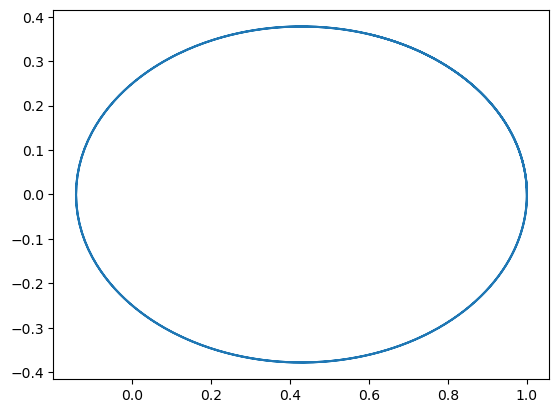

In [2]:
import numpy as np
import pylab as plt 

GM = 4*(np.pi)**2

def f(r,t):
    x  = r[0]
    vx = r[1]
    y  = r[2]
    vy = r[3]
    
    R = (x**2 + y**2)**(0.5)
    
    fx  = vx
    fvx = -GM*(x/(R**3))
    fy  = vy
    fvy = -GM*(y/(R**3))
    return np.array([fx, fvx, fy, fvy], float)

a = 0       
b = 1
N = 1000
h = (b-a)/N 

tp = np.arange(a,b,h)
xp  = []
vxp = []
yp  = []
vyp = []

    #Condiciones iniciales
r = np.array( [ 1, 0, 0, np.pi ], float)

for t in tp: 
    xp.append(r[0])
    vxp.append(r[1])
    yp.append(r[2])
    vyp.append(r[3])
    
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    
plt.plot(xp, yp)
plt.show()

# Problem 2 

Consider the equation $x = 1 - e^{-cx}$, where c is a parameter and $x$ is unknown. This equation appears in a variety of situations, including some in the physics of contact processes, in mathematical epidemiological models, and in the theory of random graphs. 

**a)** Write a program to solve the equation for x using the relaxation method for the case $c=2$. Calculate the solution with an exactitud of at least $10^{-6}$. 
***

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,c):
    return (1-np.exp(-c*x))
def s(c):
    x_0 = 1 
    ac = 1e-6
    e = 1
    while e > ac:
        x = f(x_0,c)
        e = np.abs(f(x,c)-f(x_0,c))
        
        x_0 = x
    return x

x_a = s(2)
print("with C=2 the solution ",f'{x_a:.4f}')


with C=2 the solution  0.7968


**b)** Modify your program to calculate the solution for values of c from 0 to 3 in increments of 0.01 and plot a graph of x as a function of c. You should observe a clear transition from a regime where $x = 0$ to a regime where $x$ is nonzero. This is an example of a phase transition. In physics, this transition is known as percolation transition; in epidemiology, it is known as the epidemiological threshold.
***

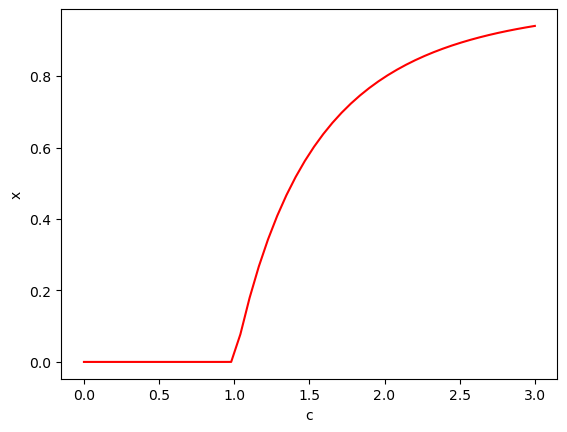

In [8]:
x_list = []
c = np.linspace(0,3)
for i in range(len(c)):
    y = s(c[i])
    x_list.append(y)

plt.plot(c,x_list,color="red")
plt.xlabel("c")
plt.ylabel("x")
plt.show()

# Problem 3 

Consider the simple circuit illustrated in Figure 1. Write a program that computes the currents given the resistances and voltages as inputs. Make your program produce a graph of the power supplied to resistor #5 as a function of $E_2$ for the range of values from $E_2 = 0$ V to $E_2 = 20$ V. For the other values, use $R_1 = R_2 = 1 \: \Omega$, $R_3 = R_4 = 2 \: \Omega$, $R_5 = 5\: \Omega$, $E_1 = 2$ V, $E_3 = 5$ V.
***

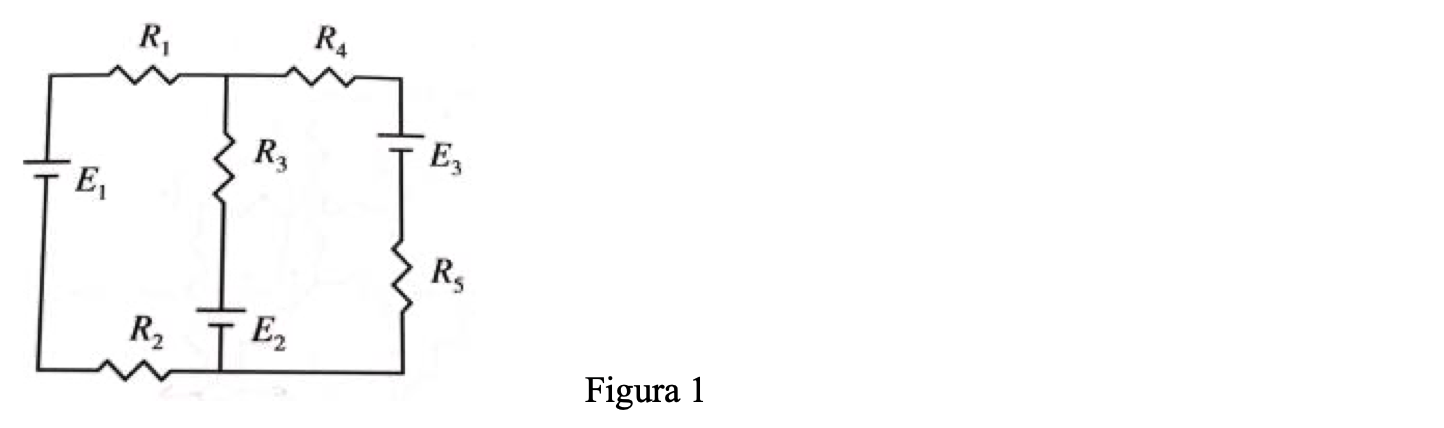

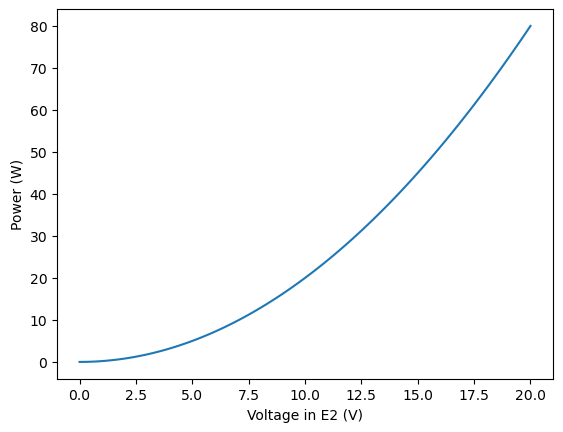

In [10]:
import numpy as np
import pylab as plt 

V = np.array([[4,0, 0, -2],
              [0,9, 0, -5],
              [0,0,-5,  3]],float)

E = np.array([-1,-1,0],float)
N = len(E)


for i in range(N):
    divide = V[i,i]
    V[i,:] /= divide
    E[i] /= divide
    for j in range(i+1,N):
        mult = V[j,i]
        V[j,:] -= mult * V[i,:]
        E[j] -= mult * E[i]
        
Nodo = np.empty(N,float)
for i in range(N-1,-1,-1):
    Nodo[i] = E[i]
    for j in range(i+1,N):
        Nodo[i] -= V[i,j]*Nodo[j]


E2 = np.linspace(0,20,100)
I2 = E2/5     
Power = I2**2 * 5

plt.plot(E2,Power)
plt.xlabel("Voltage in E2 (V)")
plt.ylabel("Power (W)")
plt.show()


# Problem 4 

Many problems in elementary mechanics deal with the physics of objects moving or flying through the air, but they often ignore friction and air resistance to simplify the equations of motion and allow for analytical solutions. When using a computer, we do not need to simplify the equations.

Consider a spherical cannonball launched from a cannon at ground level. The air resistance on a moving sphere is a force in the opposite direction of the motion with magnitude.
\begin{gather}
    F = \frac{1}{2} \pi R^2 \rho C v^2
\end{gather}
where $R$ is the radius of the sphere, $\rho$ is the air density, $v$ is the velocity, and $C$ is the so-called drag coefficient (a property of the shape of the moving object, in this case a sphere)."

**a)** Starting from Newtons second law, $\vec{F} = m \vec{a}$, show that the equations of motion for the position $(x,y)$ of the canon ball are 
\begin{align}
    \ddot{x} &= -\frac{\pi R^2 \rho C}{2m} \dot{x}\sqrt{\dot{x}^2 + \dot{y}^2} & \ddot{y} & = -g -\frac{\pi R^2 \rho C}{2m} \dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{align}
where $m$ is the mass of the cannon ball, $g$ is the acceleration due to gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ with respect to time.
***

Newtons second law states: 
\begin{align*}
    m\frac{d^2}{dt^2}\vec{r} &= -mg \hat{y} - \frac{1}{2}\pi R^2 \rho C v^2 \hat{v}\\
    &= -mg \hat{y} - \frac{1}{2}\pi R^2 \rho C v \vec{v}\\
\end{align*}
With use of Pythagoras: 
\begin{align*}
    \frac{d^2x}{dt^2} &=  - \frac{1}{2m}\pi R^2 \rho C v_x \sqrt{v_x^2 + v_y^2} & \frac{d^2y}{dt^2} &= -g  - \frac{1}{2m}\pi R^2 \rho C v_y \sqrt{v_x^2 + v_y^2}  \\
\end{align*}

**b)** Convert these two second-order differential equations into four first-order differential equations using the methods we have learned, then write a program that solves these equations for a cannonball with a mass of 1 kg and radius of 8 cm, launched at an angle of 30º with respect to the horizontal at an initial speed of 100 m/s. The air density is ρ = 1.22 kg/m³ and the drag coefficient for a sphere is C = 0.47. Plot the trajectory of the cannonball (i.e., a graph of y as a function of x).
***

(0.0, 56.472173976577515)

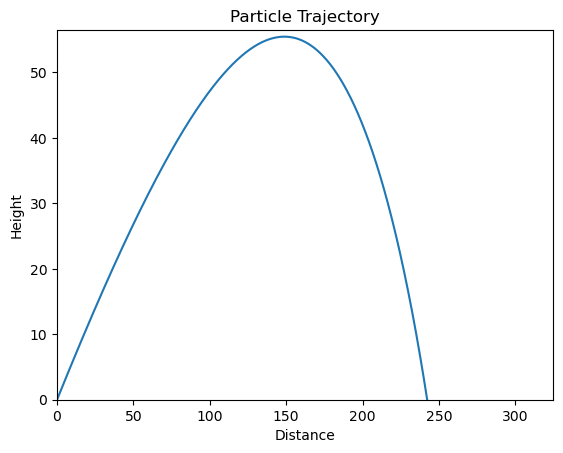

In [14]:
from numpy import array,arange,sin,cos,pi,radians,sqrt,radians
from matplotlib.pyplot import plot,close,xlabel,ylabel,title,legend,show,xlim,ylim,scatter
close("all")
g=9.81
rho = 1.22
c=0.47
m=1
R=0.08
theta=radians(30)

v0 = 100
vxi=v0*cos(theta)
vyi=v0*sin(theta)

def f(x,t):
    k=(pi*(R**2)*rho*c)/(2*m)
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    fx= vx
    fy= vy
    fvx = -k*vx*sqrt(vx**2 + vy**2)
    fvy = -g-k*vy*sqrt(vx**2 + vy**2)
    return array([fx,fvx,fy,fvy],float)

a=0
b=100
N=10000
h=(b-a)/N

tpoints=arange(a,b,h)
xp=[]
yp=[]
vxp=[]
vyp=[]
r = array([0,vxi,0,vyi],float)

for t in tpoints:
    xp.append(r[0])
    vxp.append(r[1])
    yp.append(r[2])
    vyp.append(r[3])
    k1 = h*f(r,t)
    k2 = h*f(r+.5 *k1,t+.5*h)
    k3 = h*f(r+.5 *k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+ 2*k2+ 2*k3+ k4)/6

plot(xp,yp)
title("Particle Trajectory")
xlabel("Distance")
ylabel("Height")
xlim(0,max(xp))
ylim(0,max(yp)+1)

**c)** When we ignore air resistance, the distance traveled by a projectile does not depend on the projectile's mass. In reality, however, mass does make a difference. Use your program to estimate the total distance traveled (along the horizontal ground) by the cannonball from part b), and then determine with your program whether the cannonball travels farther if it is heavier or lighter. For example, you could plot a series of trajectories of the cannonball for different masses, or you could plot the distance traveled as a function of mass. Describe briefly what you discover.
***

Text(0, 0.5, 'Distance')

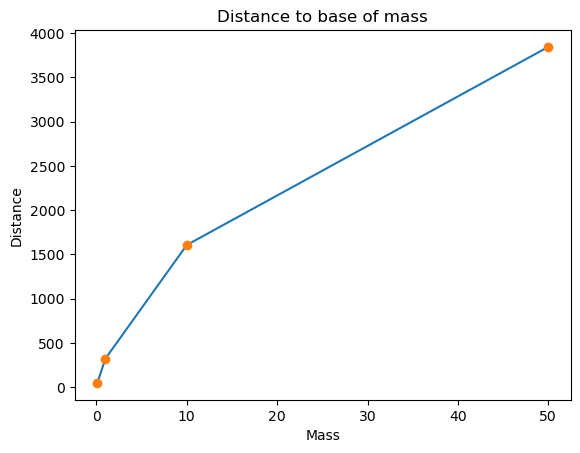

In [16]:
from numpy import array,arange,sin,cos,pi,radians,sqrt,radians
from matplotlib.pyplot import plot,close,xlabel,ylabel,title,legend,show,xlim,ylim,scatter
close("all")
g=9.81
rho = 1.22
c=0.47
R=0.08
theta=radians(30)

v0 = 100
vxi=v0*cos(theta)
vyi=v0*sin(theta)
def f(x,t):
    k=(pi*(R**2)*rho*c)/(2*m)
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    fx= vx
    fy= vy
    fvx = -k*vx*sqrt(vx**2 + vy**2)
    fvy = -g-k*vy*sqrt(vx**2 + vy**2)
    return array([fx,fvx,fy,fvy],float)

a=0
b=100
N=10000
h=(b-a)/N
tp=arange(a,b,h)

xp=[]
yp=[]
vxp=[]
vyp=[]
r = array([0,vxi,0,vyi],float)
D=[]
masas=[0.1,1,10,50]
for m in masas:
    k=(pi*(R**2)*rho*c)/(2*m)
    for t in tp:
        xp.append(r[0])
        vxp.append(r[1])
        yp.append(r[2])
        vyp.append(r[3])
        k1 = h*f(r,t)
        k2 = h*f(r+.5 *k1,t+.5*h)
        k3 = h*f(r+.5 *k2,t+.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+ 2*k2+ 2*k3+ k4)/6
    D.append(tuple((m,xp[-1])))
    xp=[]
    yp=[]
    vxp=[]
    vyp=[]
    r = array([0,vxi,0,vyi],float)

x_values= [x[0] for x in D]
y_values = [x[1] for x in D]
plot(x_values,y_values)
plot(x_values,y_values,"o")
title("Distance to base of mass")
xlabel("Mass")
ylabel("Distance")